In [1]:
import numpy as np

In [122]:
class KNN:
    def __init__(self,k = 3):
        self.k = k
        
    def sample_distance(self, sample, features_train):
        distance_2 = (sample - features_train )**2
        dist = distance_2.sum(1)
        dist -= np.max(dist)
        sortedIndex = np.argsort(dist)
        return dist, sortedIndex
    
    def clssifier(self,sample,features_train,label_train):
        dist, Index = self.sample_distance(sample,features_train)
        kIndex = Index[:self.k]
        kPred = [label_train[Index] for Index in kIndex]
        labels, lb_counts = np.unique(kPred,return_counts=True)
        return labels[np.argmax(lb_counts)]
    
    def fit(self,features_test,features_train,label_train, progressBar=True):
        self.pred_label = []
        for j in range(features_test.shape[0]):
            temp_label = self.clssifier(features_test[j,:],features_train,label_train)
            self.pred_label.append(temp_label)
    
    def get_accuarcy(self,label_train):
        print("accuracy", np.mean(np.array(self.pred_label)==label_train))
        return np.mean(np.array(self.pred_label)==label_train)
              
              
#         if progressBar:
#                 complete = (j + 1) / features_test.shape[0]
#                 not_complete = 1 - complete
#                 complete = int(50 * complete)
#                 not_complete = int(50 * not_complete)
#                 print('[' + ">" * complete, end='')
#                 print('-' * not_complete + ']' + '[%' + str((j + 1) * 100 / features_test.shape[0]) + ']')

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
data = pd.read_csv("iris.csv")
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [125]:
data = data.drop(columns = "Unnamed: 0")

In [126]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
data_ver = data[data['Species']=='versicolor']
data_vir = data[data['Species']=='virginica']

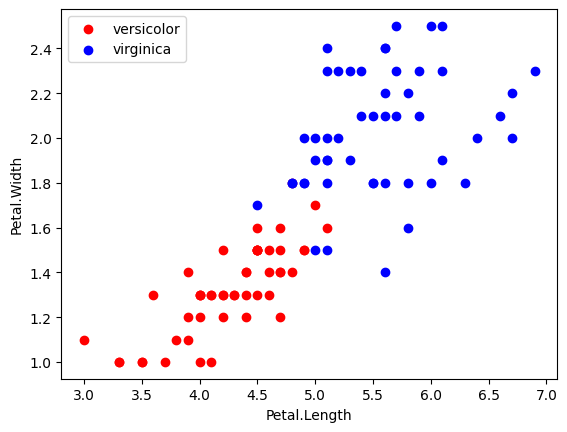

In [128]:
plt.figure()
plt.scatter(data_ver['Petal.Length'], data_ver['Petal.Width'], color='red', marker='o', label='versicolor')
plt.scatter(data_vir['Petal.Length'], data_vir['Petal.Width'], color='blue', label='virginica')
plt.xlabel('Petal.Length')  
plt.ylabel('Petal.Width')  
#plt.set_zlabel('petal length') 
plt.legend(loc='upper left')
plt.show()

In [129]:
train = np.array(pd.concat([data_ver,data_vir]))
X = train[:,0:2]
y = train[:,4]

In [130]:
np.random.shuffle(train)

In [131]:
X = train[:,0:2]
y = train[:,-1]

In [132]:
X_train, X_test = X[0:70,:], X[70:,:]
y_train, y_test = y[0:70], y[70:]

In [133]:
knn = KNN()

In [134]:
knn.fit(X_test,X_train,y_train)

In [135]:
knn.get_accuarcy(y_test)

accuracy 0.7


0.7

In [136]:
# Tuning the parameter
accuracy_ls = []
for k in range(2,11):
    knn = KNN(k)
    knn.fit(X_test,X_train,y_train)
    accuracy_ls.append(knn.get_accuarcy(y_test))

accuracy 0.7
accuracy 0.7
accuracy 0.6
accuracy 0.7
accuracy 0.7
accuracy 0.7
accuracy 0.6666666666666666
accuracy 0.6666666666666666
accuracy 0.6666666666666666


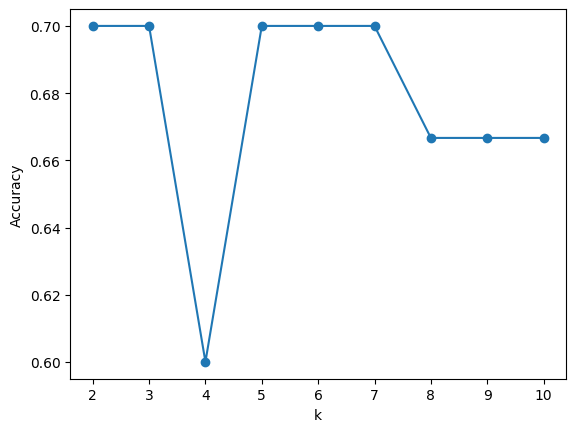

In [137]:
plt.figure()
plt.plot(range(2,11),accuracy_ls, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.show()